In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [17]:
# Load the CSV files
df_normalized_results = pd.read_csv('../data/stage/pytrends/normalized_results_2022/normalized_results_2022.csv', sep=';')

# Load the CSV files
df_normalized_results = pd.read_csv('../data/stage/pytrends/normalized_results_2022/normalized_results_2022.csv', sep=';')

# Transpose the DataFrame
df_transposed = df_normalized_results.transpose()

# Make the first row as the header
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]

# Save the reshaped DataFrame to a CSV file, keeping the old column names in the first column
df_transposed.to_csv("df_normalized_results_reshaped.csv", sep=';')

In [43]:
# Load the CSV files
df_normalized_results = pd.read_csv('df_normalized_results_reshaped.csv', sep=';')
df_articles = pd.read_csv('../data/annotation/_final/2022_January_all_articles_annotated.csv', sep=';')

df_articles['Tags'] = df_articles['Tags'].str.lower()
#When csv is loaded, the Tags array is recognized as a string, this casts it to an array
df_articles['Tags'] = df_articles['Tags'].apply(ast.literal_eval)


# Initialize a new column 'Score' with zeros
df_articles['Score'] = 0

# Iterate over the rows in df_articles
for i, row in df_articles.iterrows():
    # For each tag, look up the corresponding value in df_normalized_results for the specific date
    for tag in row['Tags']:
        if tag in df_normalized_results['Keywords'].values:
            # Get the index of the tag in df_normalized_results
            index = df_normalized_results.index[df_normalized_results['Keywords'] == tag].tolist()[0]

            # Use the index to get the value
            df_articles.at[i, 'Score'] += df_normalized_results.loc[index, row['Date']]
df_articles.to_csv("df_normalized_results_score.csv", sep=';')


/var/folders/sh/fjb1r_5j6gxcy4lzfcc4_4zr0000gn/T/ipykernel_19776/1194257263.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '68.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_articles.at[i, 'Score'] += df_normalized_results.loc[index, row['Date']]


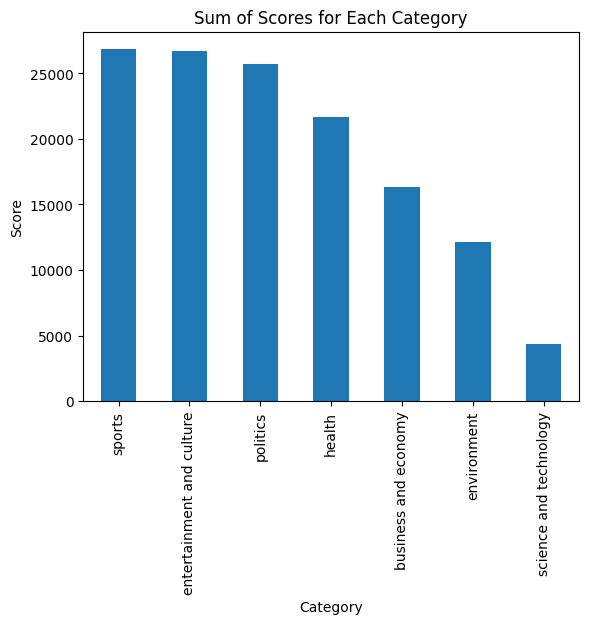

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('df_normalized_results_score_avg.csv', sep=';')

# Group by the 'Chat GPT' column and sum the 'Score' column
df_grouped = df.groupby('Chat GPT')['avg_score'].sum()

# Sort the grouped DataFrame in descending order
df_grouped = df_grouped.sort_values(ascending=False)

# Plot the sum of the scores for each category
df_grouped.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Sum of Scores for Each Category')
plt.show()

In [61]:
# Load the CSV file
df = pd.read_csv('df_normalized_results_score.csv', sep=';')

# Transform the 'Tags' column into a list
df['Tags'] = df['Tags'].apply(ast.literal_eval)

# Create a new column 'avg_score'
df['avg_score'] = df.apply(lambda row: row['Score'] / len(row['Tags']), axis=1)

# Save the DataFrame to a CSV file
df.to_csv('df_normalized_results_score_avg.csv',  sep=';', index=False)

print(df)

      Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  index  \
0                0             0             0             0      0   
1                1             1             1             1      1   
2                2             2             2             2      2   
3                3             3             3             3      3   
4                4             4             4             4      4   
...            ...           ...           ...           ...    ...   
7618          7618          7618          1617          1617   1617   
7619          7619          7619          1618          1618   1618   
7620          7620          7620          1627          1627   1627   
7621          7621          7621          1628          1628   1628   
7622          7622          7622          1630          1630   1630   

      Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3          